In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# The input
datain = np.loadtxt('03a_input.txt',comments=None,dtype=str)
datain = np.delete(datain,1,1)
datain = np.insert(datain,1,datain[:,1],axis=1)
datain = np.insert(datain,-1,datain[:,-1],axis=1)

for row in datain:
    row[0] = row[0].replace('#','') # claim
    row[1] = row[1].split(',')[0] # distance from left
    row[2] = row[2].split(',')[1].replace(':','') # distance from top
    row[3] = row[3].split('x')[0] # width
    row[4] = row[4].split('x')[1] # height
    
datain = datain.astype(int)


In [4]:
# find max dimensions of fabric

maxfabW = np.max(datain[:,1]+datain[:,3])
maxfabH = np.max(datain[:,2]+datain[:,4])

# we know it's a square of fabric, so insist use the max of the maxes
maxfabdim = max([maxfabW,maxfabH])

# define fabric array
fabric = np.zeros((maxfabdim,maxfabdim))

In [5]:
# for each claim, mark the cells in the fabric array that correspond to the used fabric
for claim in datain:
    for alongwidth in range(claim[1],claim[1]+claim[3]):
        for alongheight in range(claim[2],claim[2]+claim[4]):
            fabric[alongheight,alongwidth] += 1

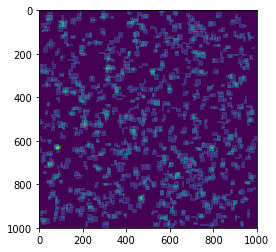

In [6]:
plt.imshow(fabric)

In [7]:
# count number of inches that are within two or more claims
fabricsum = np.zeros_like(fabric)
fabricsum[np.where(fabric > 1)] = 1



In [20]:
# Check to see if the claim covers only ones in the fabric array

for claim in datain:
    if np.array_equal(np.ones((claim[4],claim[3])) , fabric[claim[2]:claim[2]+claim[4],claim[1]:claim[1]+claim[3]]):
        print(claim[0])

1100
